In [ ]:
import pandas as pd
# df = pd.read_csv("/content/tweets-data/data.csv")
# # df = df.drop(columns=['created_at'])
# df.to_csv("data.csv", index=False)
df = pd.read_csv("https://raw.githubusercontent.com/Mfys212/dokumen/main/data%20(3).csv")
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1797971933583327483,Tue Jun 04 12:41:28 +0000 2024,14,APAKAH SUDAH NYALA LAGI? Gangguan kelistrikan ...,1797971933583327483,https://pbs.twimg.com/media/GPOtRWeawAAKoUg.jpg,NaN,in,NaN,2,8,4,https://x.com/detik_sumbagsel/status/179797193...,1691738337458151424,detik_sumbagsel
1,1777609607189549078,Tue Apr 09 08:08:51 +0000 2024,1831,Sosok Ricky Elson mencuri perhatian karena seb...,1777609607189549078,https://pbs.twimg.com/amplify_video_thumb/1777...,NaN,in,"Anseong-si, Republic of Korea",47,127,718,https://x.com/Kopipait__78/status/177760960718...,1236229061552140288,Kopipait__78
2,1799029793822060898,Fri Jun 07 10:45:01 +0000 2024,1404,Tim Pengamanan Flora dan Fauna (TPFF) Aceh Ten...,1799029793822060898,https://pbs.twimg.com/media/GPdwECbasAA8mEV.jpg,NaN,in,NaN,56,58,590,https://x.com/MongabayID/status/17990297938220...,483310591,MongabayID
3,1798325127807123563,Wed Jun 05 12:04:56 +0000 2024,4,Penjelasan resmi pln lampung listrik padam di ...,1798325127807123563,https://pbs.twimg.com/ext_tw_video_thumb/17983...,NaN,in,Indonesia,0,0,0,https://x.com/undercover_net7/status/179832512...,1588311622845886465,undercover_net7
4,1798245782140883136,Wed Jun 05 06:49:38 +0000 2024,12,Israel masih menghadang secara ketat masuknya ...,1798245782140883136,https://pbs.twimg.com/ext_tw_video_thumb/17982...,NaN,in,indonesia,0,2,6,https://x.com/LiliAngelica6/status/17982457821...,1219063624699768832,LiliAngelica6


# Cleaning Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      325 non-null    int64 
 1   created_at               325 non-null    object
 2   favorite_count           325 non-null    int64 
 3   full_text                325 non-null    object
 4   id_str                   325 non-null    int64 
 5   image_url                91 non-null     object
 6   in_reply_to_screen_name  78 non-null     object
 7   lang                     325 non-null    object
 8   location                 214 non-null    object
 9   quote_count              325 non-null    int64 
 10  reply_count              325 non-null    int64 
 11  retweet_count            325 non-null    int64 
 12  tweet_url                325 non-null    object
 13  user_id_str              325 non-null    int64 
 14  username                 325 non-null    o

In [ ]:
import re

def Clean(text):
  text = text.lower()
  text = re.sub(r'@[A-Za-z0-9_]+[^ ]*', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)
  text = re.sub(r'\[[^\]]*\]', '', text)
  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text)
  pattern = r'\bre (?!re)\w+.*'
  text = re.sub(pattern, '', text).strip()
  return text

In [ ]:
data = pd.DataFrame()
data['text'] = df['full_text']
data['text'] = data['text'].apply(Clean)
data.to_csv('sentimen_clean.csv', index=False)
data.shape

(325, 1)

In [ ]:
data

,text
0,apakah sudah nyala lagi gangguan kelistrikan t...
1,sosok ricky elson mencuri perhatian karena seb...
2,tim pengamanan flora dan fauna tpff aceh tenga...
3,penjelasan resmi pln lampung listrik padam di ...
4,israel masih menghadang secara ketat masuknya ...
...,...
320,dan sebagian sumatera sukses mati listrik 30 j...
321,taksi terbang itu pakai bahan bakar apa mz dro...
322,dulu waktu sejumlah wilayah di jawa mengalami ...
323,pak kira2 rumah bapak dan kabinet lain pernah ...


# Classification with Pretrained Large Language Models

In [ ]:
!pip install pytorch-accelerated
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 9.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [ ]:
from transformers import pipeline
from tqdm import tqdm

tqdm.pandas()
pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"

nlp = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)

def sentiment_analysis(teks):
  try:
    label = nlp(teks)[0]
    return label['label']
  except:
    return pd.NA

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
data['sentimen'] = data['text'].progress_apply(sentiment_analysis)
data = data.dropna()
print("\n",data.shape)
data

100%|██████████| 325/325 [00:53<00:00,  6.08it/s]


 (324, 2)


,text,sentimen
0,apakah sudah nyala lagi gangguan kelistrikan t...,neutral
1,sosok ricky elson mencuri perhatian karena seb...,positive
2,tim pengamanan flora dan fauna tpff aceh tenga...,neutral
3,penjelasan resmi pln lampung listrik padam di ...,neutral
4,israel masih menghadang secara ketat masuknya ...,neutral
...,...,...
320,dan sebagian sumatera sukses mati listrik 30 j...,neutral
321,taksi terbang itu pakai bahan bakar apa mz dro...,negative
322,dulu waktu sejumlah wilayah di jawa mengalami ...,negative
323,pak kira2 rumah bapak dan kabinet lain pernah ...,negative


## Exploratory Data Analysis

## Proportion of sentiment types

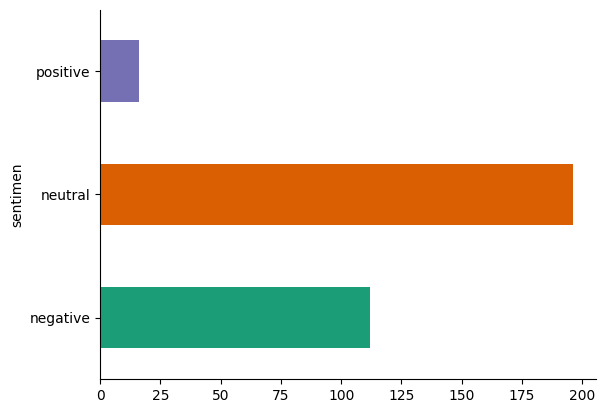

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

data.groupby('sentimen').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## The word dominates

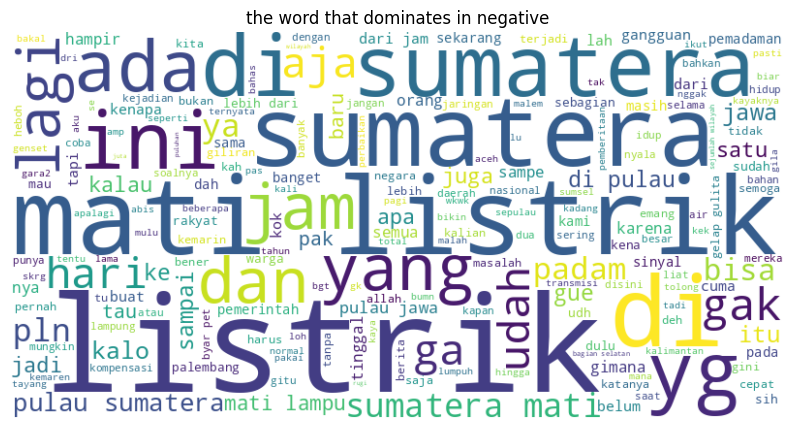

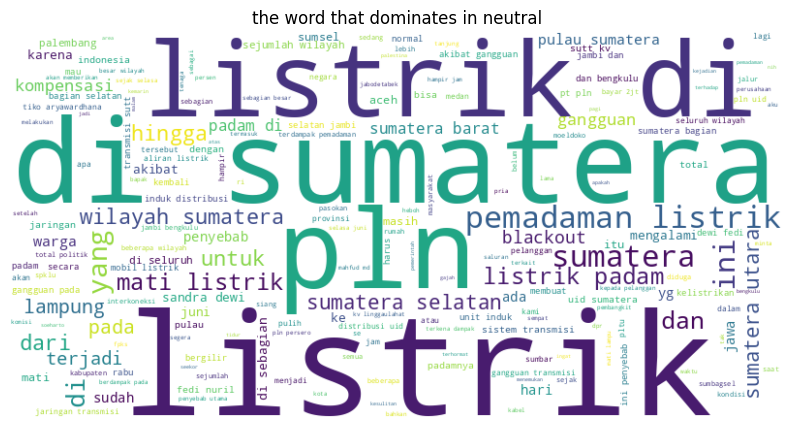

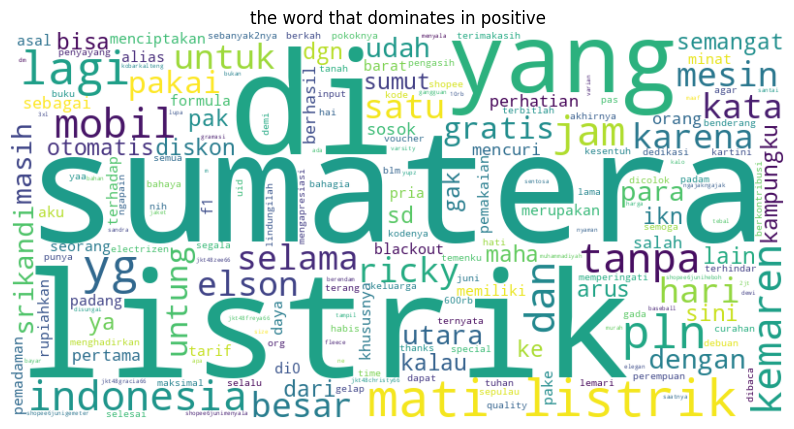

In [ ]:
from wordcloud import WordCloud
import numpy as np

cls = np.unique(np.array(data['sentimen']))
for i in cls:
  texts = ' '.join(data[data['sentimen']==i]['text'].tolist())
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texts)
  plt.figure(figsize=(10, 6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title("the word that dominates in "+i)
  plt.show()
  print("\n")

## Analysis Confidence Interval

jumlah total penduduk di sumatera adalah 59770000 (2022)

estimasi sentimen proporsi positive, netral, dan negatife dari sampel yang diperoleh dengan membagi jumlah sentimen dengan jumlah sampel: \
$\hat{p} = \bar{y} = \frac{\sum^n_{i=1} y_i}{n}$ \
estimasi varians: \
$\hat{V}(\hat{p}) = (1-\frac{n}{N})\frac{\hat{p}\hat{q}}{n-1}$ \
$\hat{q} = 1-\hat{p}$ \
batas error: \
$2\sqrt{\hat{V}(\hat{p})}=2\sqrt{(1-\frac{n}{N})\frac{\hat{p}\hat{q}}{n-1}}$ \
N = 59770000

In [ ]:
class Estimate():
  def __init__(self, y, n, N):
    self.y = y
    self.n = n
    self.N = N

  def estimate_proportion(self):
    return self.y / self.n

  def estimate_var(self):
    p = self.estimate_proportion()
    q = 1 - p
    v = (1 - (self.n / self.N)) * ((p * q)/(self.n - 1))
    return v

  def boe(self):
    error = 2*np.sqrt(self.estimate_var())
    return error

  def confidence_interval(self):
    lower = self.estimate_proportion() - self.boe()
    upper = self.estimate_proportion() + self.boe()
    return lower, upper

  def show_table(self):
    table = pd.DataFrame()
    p = f"{self.estimate_proportion()*100:.4f}%"
    table['Estimasi Proporsi'] = [p]
    v = f"{self.estimate_var():.5f}"
    table['Estimasi Variasi'] = [v]
    l, u = self.confidence_interval()
    ci = f"{l*100:.4f}%  -  {u*100:.4f}%"
    table['Selang Kepercayaan'] = [ci]
    return table

n, N = len(data), 59770000

### Sentimen Positive

In [ ]:
n_pos = len(data[data['sentimen']=='positive'])
positive = Estimate(n_pos, n, N)
positive.show_table()

,Estimasi Proporsi,Estimasi Variasi,Selang Kepercayaan
0,4.9383%,0.00015,2.5272% - 7.3494%


Perkiraan 2.5272% - 7.3494% penduduk sumatera memberikan tanggapan positive terhadap mati listrik kemarin, dengan nilai estimasi 4.9383%

### Sentimen Netral

In [ ]:
n_pos = len(data[data['sentimen']=='neutral'])
neutral = Estimate(n_pos, n, N)
neutral.show_table()

,Estimasi Proporsi,Estimasi Variasi,Selang Kepercayaan
0,60.4938%,0.00074,55.0536% - 65.9340%


Perkiraan 55.0536% - 65.9340% penduduk sumatera memberikan tanggapan netral terhadap mati listrik kemarin, dengan nilai estimasi 60.4938%

### Sentimen Negative

In [ ]:
n_pos = len(data[data['sentimen']=='negative'])
negative = Estimate(n_pos, n, N)
negative.show_table()

,Estimasi Proporsi,Estimasi Variasi,Selang Kepercayaan
0,34.5679%,0.00070,29.2754% - 39.8604%


Perkiraan 29.2754% - 39.8604% penduduk sumatera memberikan tanggapan netral terhadap mati listrik kemarin, dengan nilai estimasi 34.5679%

# Analisis LDA

![LDA](https://raw.githubusercontent.com/Mfys212/dokumen/main/LDA%20NLP.png)

Tujuan dari inferensi dalam LDA adalah untuk memperkirakan distribusi topik $\theta_d$ dan distribusi kata $\phi_k$ dari data dokumen $w$.

$P(w, z, \theta, \phi | \alpha, \beta) = \left( \prod_{k=1}^{K} P(\phi_k | \beta) \right) \left( \prod_{d=1}^{D} P(\theta_d | \alpha) \prod_{n=1}^{N_d} P(z_{d,n} | \theta_d) P(w_{d,n} | z_{d,n}, \phi) \right)$


Distribusi Dirichlet digunakan untuk mengatur distribusi topik dalam dokumen $(\theta_d)$ dan distribusi kata dalam topik $(\phi_k)$: \
$\text{Dir}(\alpha) = \frac{1}{B(\alpha)} \prod_{i=1}^{K} \theta_i^{\alpha_i - 1}$ \
di mana $B(\alpha)$ adalah fungsi Beta yang mendistribusikan normalisasi.

Distribusi Multinomial digunakan untuk memilih topik $z_{d,n}$ dan kata $w_{d,n}$: \
$P(z_{d,n} = k | \theta_d) = \theta_{d,k}$ \
$P(w_{d,n} = w | z_{d,n} = k, \phi_k) = \phi_{k,w}$

Probabilitas untuk memilih kata $w_{d,n}$: \
$P(w_{d,n} = w | \theta_d, \phi) = \sum_{k=1}^{K} P(w_{d,n} = w | z_{d,n} = k, \phi_k) \cdot P(z_{d,n} = k | \theta_d) = \sum_{k=1}^{K} \phi_{k,w} \cdot \theta_{d,k}$ \
\
 $D$: Jumlah dokumen dalam koleksi. \
 $N_d$: Jumlah kata dalam dokumen ke-$d$. \
 $K$: Jumlah topik yang ingin ditemukan. \
 $V$: Jumlah total kata unik (vocabulary size). \
 $\alpha$: Hyperparameter Dirichlet untuk distribusi topik per dokumen. \
 $\beta$: Hyperparameter Dirichlet untuk distribusi kata per topik. \
 $\theta_d$: Distribusi topik untuk dokumen ke-$d$. \
 $\phi_k$: Distribusi kata untuk topik ke-$k$. \
 $z_{d,n}$: Variabel laten yang menunjukkan topik dari kata ke-$n$ dalam dokumen ke-$d$. \
 $w_{d,n}$: Kata ke-$n$ dalam dokumen ke-$d$. \





In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.4 MB/s eta 0:00:00


In [ ]:
corpus = pd.read_csv("https://raw.githubusercontent.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection/master/new_kamusalay.csv", encoding='latin1')
kamus = dict(zip(corpus['anakjakartaasikasik'], corpus['anak jakarta asyik asyik']))

def transform_text(text):
  words = text.split()
  words_ = [kamus.get(word, word) for word in words]
  return ' '.join(words_)

data['text'] = data['text'].apply(transform_text)

<ipython-input-90-26eb12613af8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(transform_text)


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora
import nltk
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
nltk.download('punkt')

stop_factory = StopWordRemoverFactory()
stopword = stop_factory.create_stop_word_remover()

def preprocess_text(text):
  text = stopword.remove(text)
  stop_words = set(stopwords.words('indonesian'))
  tokens = word_tokenize(text.lower())
  filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
  return filtered_tokens

def lda_analysis(texts, num_topics=3):
  processed_texts = [preprocess_text(text) for text in texts]
  dictionary = corpora.Dictionary(processed_texts)
  corpus = [dictionary.doc2bow(text) for text in processed_texts]
  lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

  return lda_model

positive_texts = data[data['sentimen'] == 'positive']['text']
neutral_texts = data[data['sentimen'] == 'neutral']['text']
negative_texts = data[data['sentimen'] == 'negative']['text']

print("LDA untuk Sentimen Positif:")
positive_lda = lda_analysis(positive_texts)
for idx, topic in positive_lda.print_topics(num_words=10):
  print(f"Topik {idx + 1}: {topic}")

print("\nLDA untuk Sentimen Netral:")
neutral_lda = lda_analysis(neutral_texts)
for idx, topic in neutral_lda.print_topics(num_words=10):
  print(f"Topik {idx + 1}: {topic}")

print("\nLDA untuk Sentimen Negatif:")
negative_lda = lda_analysis(negative_texts)
for idx, topic in negative_lda.print_topics(num_words=10):
  print(f"Topik {idx + 1}: {topic}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LDA untuk Sentimen Positif:
Topik 1: 0.045*"sumatra" + 0.045*"listrik" + 0.021*"utara" + 0.016*"kota" + 0.016*"mobil" + 0.011*"indonesia" + 0.011*"arus" + 0.011*"ikn" + 0.011*"kampungku" + 0.011*"otomatis"
Topik 2: 0.035*"sumatra" + 0.035*"listrik" + 0.022*"mati" + 0.015*"dasar" + 0.015*"diskon" + 0.015*"sekolah" + 0.009*"jam" + 0.009*"kasih" + 0.009*"6" + 0.009*"selesai"
Topik 3: 0.060*"listrik" + 0.031*"sumatra" + 0.019*"kemarin" + 0.019*"pakai" + 0.014*"negara" + 0.014*"perusahaan" + 0.014*"maha" + 0.014*"gratis" + 0.014*"mati" + 0.008*"kasih"

LDA untuk Sentimen Netral:
Topik 1: 0.046*"listrik" + 0.036*"sumatra" + 0.016*"padam" + 0.011*"gangguan" + 0.010*"wilayah" + 0.008*"akibat" + 0.008*"dewi" + 0.008*"sandra" + 0.008*"utara" + 0.007*"aceh"
Topik 2: 0.096*"listrik" + 0.071*"sumatra" + 0.030*"negara" + 0.027*"perusahaan" + 0.023*"pemadaman" + 0.019*"selatan" + 0.015*"wilayah" + 0.012*"padam" + 0.012*"penyebab" + 0.011*"gangguan"
Topik 3: 0.064*"listrik" + 0.046*"sumatra" + 0.017*"

Sentimen Positif:

Topik 1: "sumatra", "listrik", "utara", "kota", "mobil", "indonesia", "arus", "ikn", "kampungku", dan "otomatis". Mungkin berkaitan dengan perkembangan dan kemajuan infrastruktur di Sumatera, terutama yang berhubungan dengan listrik dan transportasi. \
Topik 2: "sumatra", "listrik", "mati", "dasar", "diskon", "sekolah", "jam", "kasih", "6", dan "selesai". Mungkin berhubungan dengan pemadaman listrik yang sudah diatasi atau perbaikan layanan listrik yang memberikan dampak positif. \
Topik 3: "listrik", "sumatra", "kemarin", "pakai", "negara", "perusahaan", "maha", "gratis", "mati", dan "kasih". Mungkin membahas pada layanan listrik gratis atau diskon yang ditawarkan oleh perusahaan listrik dan dampaknya di wilayah Sumatra.



Sentimen Netral:

Topik 1: "listrik", "sumatra", "padam", "gangguan", "wilayah", "akibat", "dewi", "sandra", "utara", dan "aceh". Mungkin tentang kejadian padamnya listrik di berbagai wilayah di Sumatera, termasuk penyebab dan dampaknya. \
Topik 2: "listrik", "sumatra", "negara", "perusahaan", "pemadaman", "selatan", "wilayah", "padam", "penyebab", dan "gangguan". Mungkin membahas isu-isu pemadaman listrik yang melibatkan perusahaan listrik dan dampaknya di berbagai wilayah Sumatra. \
Topik 3: "listrik", "sumatra", "mati", "perusahaan", "negara", "pemadaman", "padam", "pulau", "gara", dan "utara". Mungkin berkaitan dengan masalah pemadaman listrik dan tanggapan dari perusahaan listrik serta pemerintah.



Sentimen Negatif:

Topik 1: "listrik", "sumatra", "mati", "jam", "jawa", "pulau", "negara", "lampu", "banget", dan "perusahaan". Mungkin ketidakpuasan terhadap pemadaman listrik di Sumatra dan Jawa serta dampaknya yang signifikan. \
Topik 2: "sumatra", "listrik", "gara", "orang", "2", "padam", "gue", "gangguan", "negara", dan "pulau". Mungkin menunjukkan frustrasi terkait gangguan listrik yang sering terjadi dan dampaknya terhadap aktivitas sehari-hari. \
Topik 3: "listrik", "sumatra", "pulau", "padam", "jam", "negara", "perusahaan", "jawa", "mati", dan "kayak". Mungkin ketidakpuasan terhadap pemadaman listrik yang berkepanjangan dan kurangnya respons efektif dari perusahaan listrik dan pemerintah.